# ML Model

In [1]:
# importing important modules
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn. decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# Pipeline in SkLearn

In [43]:
# Load dataset
df= pd.read_csv('../data/scaled_data.csv')
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.335706,-2.183545,1.526900,1.477828,1.708051,-0.152054,-0.283578,2.887302,2.646196,2.837042,...,-1.400167,2.761488,-0.224151,1.429505,-0.206236,2.497158,2.296076,0.002570,2.739080,1
1,2.168713,-0.336098,1.999151,2.692856,-0.858619,-0.466377,0.107062,0.680991,0.084394,-0.938952,...,-0.357761,1.873778,-0.224151,-0.369836,-0.404542,-0.084360,1.087084,-0.152067,0.548993,1
2,1.884587,0.533878,1.863554,2.233014,1.037027,1.359343,1.809179,2.336656,1.169045,-0.370155,...,0.005710,1.657012,2.425960,0.595436,1.460157,1.061762,1.955000,1.701432,0.443446,1
3,-0.785558,0.316384,-0.587475,-0.821005,-0.009925,-0.152054,2.486945,1.685632,-0.000015,-0.104601,...,0.172015,-0.188255,-0.532056,-0.018402,-0.206236,2.359931,2.175786,0.002570,-0.109206,1
4,2.078309,-1.193573,2.102017,2.584438,0.327875,0.750470,1.818421,1.659821,0.071733,-0.568891,...,-1.513323,1.646690,2.078659,0.267431,-0.260319,0.785112,0.729259,-0.981094,-0.348151,1


In [44]:
df.columns.shape

(31,)

In [45]:
# Features from Casual Graph
casual_features = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

# Pipeline Using the whole Data

In [46]:
X= df.iloc[:,0:30]
y= df['diagnosis']

print('X shape',X.shape)
print('y shape',y.shape)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20, random_state= 30)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (569, 30)
y shape (569,)
X_train shape (549, 30)
X_test shape (20, 30)
y_train shape (549,)
y_test shape (20,)


## Logistic Regression

In [66]:
# Pipeline Logistic Regression: 

pipeline_lr = Pipeline([
    ('scaler1',StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('lr_classifier', LogisticRegression(random_state=0))
])

<AxesSubplot:>

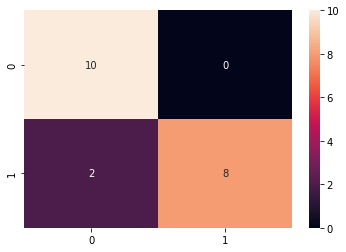

In [74]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_lr.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

## Decision Tree Classifier

In [67]:
# Pipeline Decision Tree Classifier:

pipeline_dtc= Pipeline([
    ('scaler2', StandardScaler()),
    ('pca2', PCA(n_components=2)),
    ('dt_classifier', DecisionTreeClassifier())
])

<AxesSubplot:>

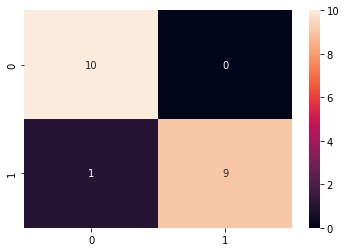

In [17]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_dtc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

## Random Forest Classifier

In [68]:
# Pipeline Random Forest Classifier:

pipeline_rfc = Pipeline([
    ('scaler3', StandardScaler()),
    ('pca2', PCA(n_components=3)),
    ('rf_classifier', RandomForestClassifier())
])

<AxesSubplot:>

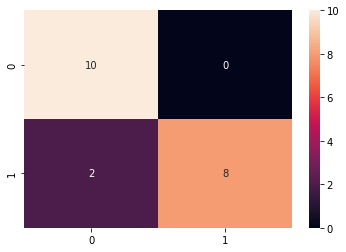

In [18]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_rfc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [69]:
# Make the list of pipeline: 

pipeline = [pipeline_lr,pipeline_dtc,pipeline_rfc]

best_accuracy = 0.0
best_classifier= 0
best_pipeline = ""

In [70]:
# Dictionary of pipeline and classifier types for ease of reference:

pipe_dict = { 0: 'Logistic Regression', 1: 'Decision Tree', 2:'RandomForest'}

# fit the pipleline 
for pipe in pipeline:
    pipe.fit(X_train, y_train)

In [71]:
for i, model in enumerate(pipeline):
    print('{} Test Accuracy: {}'.format(pipe_dict[i],model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.9
Decision Tree Test Accuracy: 1.0
RandomForest Test Accuracy: 0.9


In [72]:
for i, model in enumerate(pipeline):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy= model.score(X_test, y_test)
        best_pipeline= model
        best_classifier= i
print('classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

classifier with best accuracy:Decision Tree


Feature ranking:
1. feature 27 (0.696484)
2. feature 23 (0.104808)
3. feature 13 (0.035814)
4. feature 24 (0.034340)
5. feature 21 (0.024254)
6. feature 29 (0.018801)
7. feature 1 (0.014861)
8. feature 22 (0.012098)
9. feature 28 (0.011096)
10. feature 20 (0.009730)
11. feature 10 (0.007786)
12. feature 26 (0.007694)
13. feature 6 (0.007056)
14. feature 19 (0.006527)
15. feature 2 (0.003916)
16. feature 8 (0.003504)
17. feature 14 (0.001230)
18. feature 12 (0.000000)
19. feature 11 (0.000000)
20. feature 15 (0.000000)
21. feature 9 (0.000000)
22. feature 16 (0.000000)
23. feature 7 (0.000000)
24. feature 17 (0.000000)
25. feature 5 (0.000000)
26. feature 4 (0.000000)
27. feature 3 (0.000000)
28. feature 18 (0.000000)
29. feature 25 (0.000000)
30. feature 0 (0.000000)


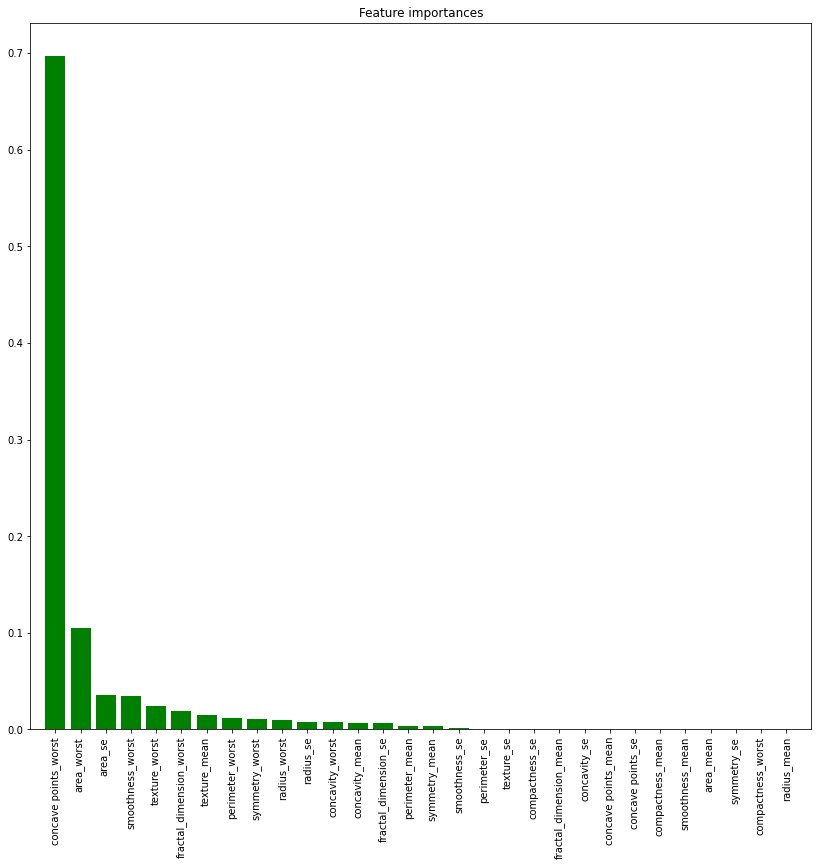

In [73]:
import matplotlib.pyplot as plt
clf_rf_5 = DecisionTreeClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
# std = np.std([tree.feature_importances_ for tree in pipeline_dtc.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [75]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])


Predicted: [0 1 0 1 0 1 0 0 0 0]
Actual: 197    1
351    1
338    0
47     1
474    0
24     1
309    0
556    0
158    0
364    0
Name: diagnosis, dtype: int64


In [77]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

df1 = pred_dt[0:10]

df2 = y_test[0:10]

ax = df1.plot(x='diagnosis')
df2.plot(ax=ax)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Pipeline Using features extracted from casual graph

In [87]:
# Features from Casual Graph
casual_features = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [88]:
causality_df = df[casual_features]

In [89]:
causality_df.head()

,radius_mean,texture_mean,perimeter_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,area_se,concavity_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.335706,-2.183545,1.526900,-0.152054,-0.283578,2.887302,2.646196,2.837042,-0.157898,-0.580647,...,-0.213189,1.464731,2.313300,-1.400167,2.761488,-0.224151,-0.206236,2.497158,2.296076,0.002570
1,2.168713,-0.336098,1.999151,-0.466377,0.107062,0.680991,0.084394,-0.938952,1.201429,-0.984975,...,2.907884,-0.523504,2.219021,-0.357761,1.873778,-0.224151,-0.404542,-0.084360,1.087084,-0.152067
2,1.884587,0.533878,1.863554,1.359343,1.809179,2.336656,1.169045,-0.370155,2.454141,-0.859949,...,-0.213189,0.592579,1.875747,0.005710,1.657012,2.425960,1.460157,1.061762,1.955000,1.701432
3,-0.785558,0.316384,-0.587475,-0.152054,2.486945,1.685632,-0.000015,-0.104601,0.904522,0.010748,...,-0.043121,1.627729,-0.217742,0.172015,-0.188255,-0.532056,-0.206236,2.359931,2.175786,0.002570
4,2.078309,-1.193573,2.102017,0.750470,1.818421,1.659821,0.071733,-0.568891,2.526044,-0.873160,...,-0.213189,1.643010,1.626752,-1.513323,1.646690,2.078659,-0.260319,0.785112,0.729259,-0.981094


In [90]:
X= causality_df.iloc[:,:]
y= df['diagnosis']

print('X shape',X.shape)
print('y shape',y.shape)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20, random_state= 30)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (569, 21)
y shape (569,)
X_train shape (549, 21)
X_test shape (20, 21)
y_train shape (549,)
y_test shape (20,)


In [91]:
# Pipeline Decision Tree Classifier:

pipeline_dtc= Pipeline([
    ('scaler2', StandardScaler()),
    ('pca2', PCA(n_components=2)),
    ('dt_classifier', DecisionTreeClassifier())
])

In [92]:
# Pipeline Random Forest Classifier:

pipeline_rfc = Pipeline([
    ('scaler3', StandardScaler()),
    ('pca2', PCA(n_components=3)),
    ('rf_classifier', RandomForestClassifier())
])

In [93]:
# Pipeline Logistic Regression: 

pipeline_lr = Pipeline([
    ('scaler1',StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('lr_classifier', LogisticRegression(random_state=0))
])

In [94]:
# Make the list of pipeline: 

pipeline = [pipeline_lr,pipeline_dtc,pipeline_rfc]

best_accuracy = 0.0
best_classifier= 0
best_pipeline = ""

In [95]:
# Dictionary of pipeline and classifier types for ease of reference:

pipe_dict = { 0: 'Logistic Regression', 1: 'Decision Tree', 2:'RandomForest'}

# fit the pipleline 
for pipe in pipeline:
    pipe.fit(X_train, y_train)

In [96]:
for i, model in enumerate(pipeline):
    print('{} Test Accuracy: {}'.format(pipe_dict[i],model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 1.0
Decision Tree Test Accuracy: 0.9
RandomForest Test Accuracy: 0.95


In [97]:
for i, model in enumerate(pipeline):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy= model.score(X_test, y_test)
        best_pipeline= model
        best_classifier= i
print('classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

classifier with best accuracy:Logistic Regression


In [98]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 0 1 0 1 0 0 0 0]
Actual: 197    1
351    1
338    0
47     1
474    0
24     1
309    0
556    0
158    0
364    0
Name: diagnosis, dtype: int64


Feature ranking:
1. feature 19 (0.696484)
2. feature 16 (0.105492)
3. feature 11 (0.035814)
4. feature 14 (0.026474)
5. feature 15 (0.021828)
6. feature 18 (0.018346)
7. feature 17 (0.016411)
8. feature 1 (0.014861)
9. feature 2 (0.012836)
10. feature 12 (0.011096)
11. feature 0 (0.008794)
12. feature 20 (0.007612)
13. feature 9 (0.007290)
14. feature 7 (0.006266)
15. feature 10 (0.005222)
16. feature 4 (0.001835)
17. feature 3 (0.001821)
18. feature 8 (0.001519)
19. feature 6 (0.000000)
20. feature 5 (0.000000)
21. feature 13 (0.000000)


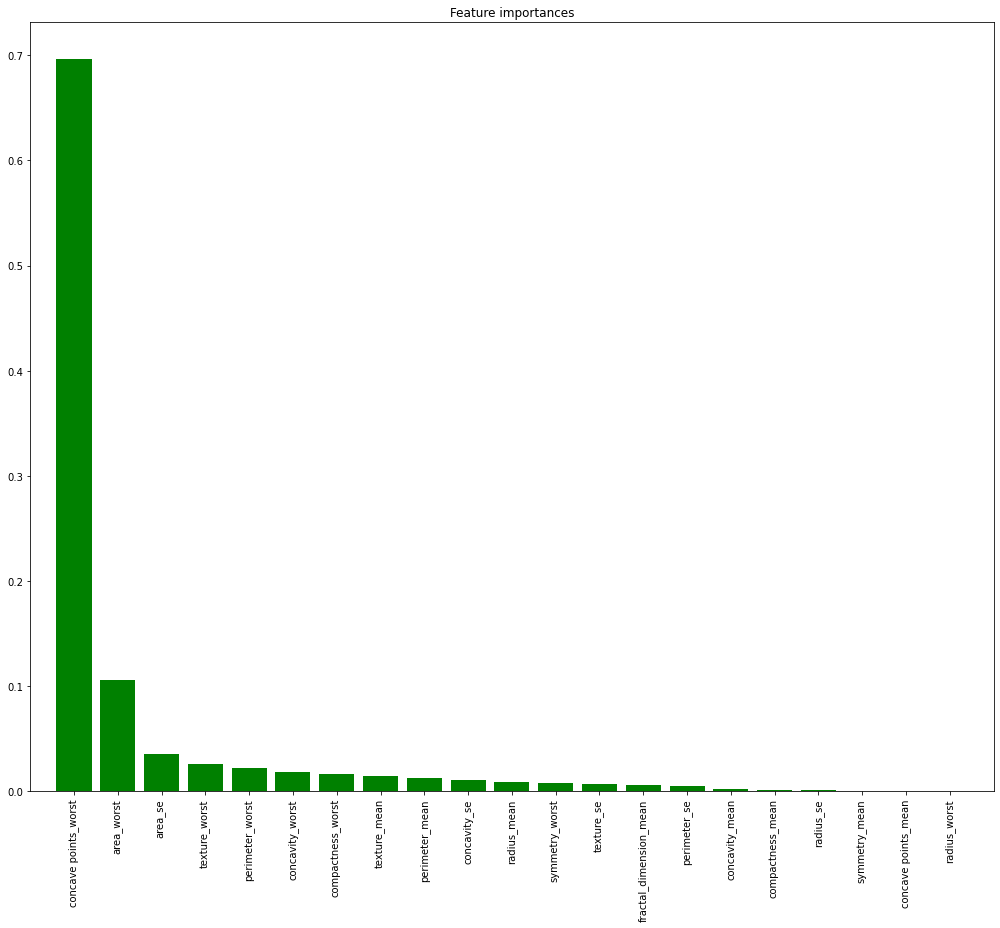

In [99]:
import matplotlib.pyplot as plt
clf_rf_5 = DecisionTreeClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
# std = np.std([tree.feature_importances_ for tree in pipeline_dtc.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()